In [4]:
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

print('Libraries Imported Successfully')

Libraries Imported Successfully


In [5]:
df = pd.read_csv('Stroke Data/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
## One Hot Encoding Data

hotCols = df.columns[df.dtypes == 'object']
dfNot = df[df.columns[df.dtypes != 'object']]
dfHot = pd.get_dummies(df[hotCols], drop_first=True)

dfNew = pd.concat([dfHot,dfNot], axis = 1)
print(df.shape, dfNew.shape)
dfNew

(4981, 11) (4981, 15)


,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,1,0,0,1,1,0,0,67.0,0,1,228.69,36.6,1
1,1,1,1,0,0,0,0,1,0,80.0,0,1,105.92,32.5,1
2,0,1,1,0,0,1,0,0,1,49.0,0,0,171.23,34.4,1
3,0,1,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1
4,1,1,1,0,0,1,1,0,0,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,1,0,0,0,1,0,0,41.0,0,0,70.15,29.8,0
4977,1,1,1,0,0,1,0,0,1,40.0,0,0,191.15,31.1,0
4978,0,1,0,0,0,0,0,0,1,45.0,1,0,95.02,31.8,0
4979,1,1,1,0,0,0,0,0,1,40.0,0,0,83.94,30.0,0


In [7]:
## Splitting and Scaling the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Split the data
X = dfNew.drop('stroke', axis = 1)
y = dfNew['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .15, random_state=101)

## Scaling certain columns
numCols = list(dfNot.columns)
numCols.remove('stroke')

scaler = StandardScaler()
X_train_feat = X_train[numCols]
X_train_feat_scaled = scaler.fit_transform(X_train_feat)
X_train[numCols] = X_train_feat_scaled

X_test_feat = X_test[numCols]
X_test_feat_scaled = scaler.fit_transform(X_test_feat)
X_test[numCols] = X_test_feat_scaled

In [8]:
sampler = RandomOverSampler(sampling_strategy='minority')
X_train_sample, y_train_sample = sampler.fit_resample(X_train, y_train)

new_sampler = RandomOverSampler(sampling_strategy='minority')
X_test_sample, y_test_sample = new_sampler.fit_resample(X_test, y_test)

print(X_train_sample.shape, X_test_sample.shape)

(8064, 14) (1402, 14)


In [9]:
def grid_search_model(X_train = X_train_sample, X_test = X_test_sample, y_train = y_train_sample, y_test = y_test_sample, param_grid = {}, model = ''):
    ## Imports Needed
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

    gridModel = GridSearchCV(model, param_grid=param_grid, cv=10)

    gridModel.fit(X_train, y_train)
    yhat = gridModel.predict(X_test)

    print('------------------------ Grid Search CV Best Params ------------------------')
    print(gridModel.best_params_)
    print('------------------------ Classification Report ------------------------')
    print(classification_report(y_test, yhat))
    print('------------------------ Confusion Matrix ------------------------')
    plot_confusion_matrix(gridModel, X_test, y_test)

    return gridModel

In [7]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': np.linspace(0,12,10),
    'class_weight': ['balanced'],
    'solver': ['newton-cg'],
}

model = grid_search_model(param_grid=param_grid, model = LogisticRegression())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_reg_strength * weights
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaco

------------------------ Grid Search CV Best Params ------------------------
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 8}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       701
           1       0.00      0.00      0.00        47

    accuracy                           0.94       748
   macro avg       0.47      0.50      0.48       748
weighted avg       0.88      0.94      0.91       748

------------------------ Confusion Matrix ------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/util

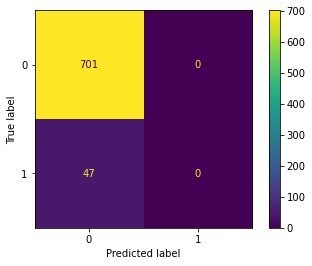

In [39]:
## K Nearest Neighbors not a strong algorithm for this dataset

from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1,21)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean']
}

knn_model = grid_search_model(X_train, X_test, y_train, y_test, param_grid=param_grid, model = KNeighborsClassifier())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
960 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-package

------------------------ Grid Search CV Best Params ------------------------
{'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       701
           1       0.76      0.81      0.79       701

    accuracy                           0.78      1402
   macro avg       0.78      0.78      0.78      1402
weighted avg       0.78      0.78      0.78      1402

------------------------ Confusion Matrix ------------------------


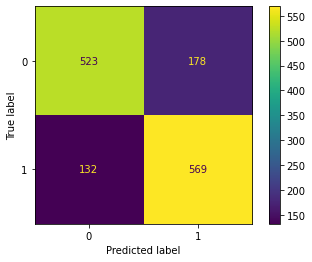

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50,100,150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6],
    'min_samples_split': [1,2,3,4,5],
    'max_features': [2,3,4, 'sqrt']
}

randFor_model = grid_search_model(param_grid=param_grid, model = RandomForestClassifier())


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.py

------------------------ Grid Search CV Best Params ------------------------
{'C': 20.0, 'degree': 5, 'kernel': 'poly'}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.55      0.88      0.68       701
           1       0.70      0.27      0.39       701

    accuracy                           0.58      1402
   macro avg       0.62      0.58      0.53      1402
weighted avg       0.62      0.58      0.53      1402

------------------------ Confusion Matrix ------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


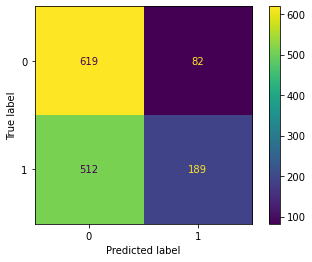

In [42]:
## Support Vector Classifier
from sklearn.svm import SVC 

param_grid = {
    'C': np.linspace(0,20,5),
    'degree': [2,3,4,5],
    'kernel': ['poly', 'rbf', 'sigmoid'],
}

svm_model = grid_search_model(param_grid = param_grid, model = SVC())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: 

------------------------ Grid Search CV Best Params ------------------------
{'criterion': 'mse', 'learning_rate': 0.75, 'loss': 'deviance', 'n_estimators': 50}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.60      0.87      0.71       701
           1       0.77      0.43      0.55       701

    accuracy                           0.65      1402
   macro avg       0.69      0.65      0.63      1402
weighted avg       0.69      0.65      0.63      1402

------------------------ Confusion Matrix ------------------------


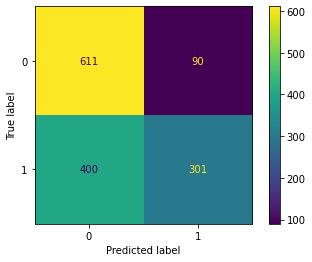

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': np.linspace(0,1,5),
    'n_estimators': [50],
    'criterion': ['mse', 'friedman_mse']
}

grad_model = grid_search_model(param_grid = param_grid, model = GradientBoostingClassifier())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sk

------------------------ Grid Search CV Best Params ------------------------
{'criterion': 'mse', 'learning_rate': 0.8, 'loss': 'deviance', 'n_estimators': 100}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.61      0.92      0.73       701
           1       0.84      0.41      0.55       701

    accuracy                           0.66      1402
   macro avg       0.72      0.66      0.64      1402
weighted avg       0.72      0.66      0.64      1402

------------------------ Confusion Matrix ------------------------


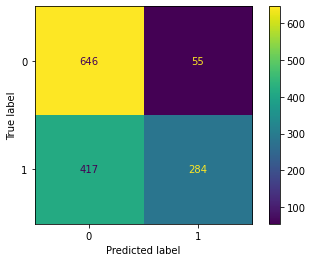

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'loss': ['deviance'],
    'learning_rate': np.linspace(.6,1,5),
    'n_estimators': [50,100],
    'criterion': ['mse', 'friedman_mse']
}

grad_model = grid_search_model(param_grid = param_grid, model = GradientBoostingClassifier())

In [13]:
## Best Model Seems to be the Logistic Regression Model